## Часть 1: Введение в Pandas

Pandas - это библиотека Python для работы с данными. Она предоставляет мощные инструменты для анализа и манипуляции данными.

### Установка Pandas

Для начала убедитесь, что у вас установлена библиотека Pandas. Если ее нет, установите ее с помощью команды:


In [10]:
!pip install pandas

## Импорт библиотеки
Давайте начнем с импорта библиотеки Pandas:

In [11]:
import pandas as pd

## Часть 2: Работа с данными
### Чтение данных
Мы будем использовать датасет Titanic. Давайте прочитаем данные из CSV файла.

In [12]:
import pandas as pd

# Чтение данных из CSV файла
titanic_data = pd.read_csv('titanic.csv')  # предполагая, что файл в той же директории


### Предпросмотр данных
Для первого ознакомления с данными давайте выведем первые несколько строк.

In [13]:
import pandas as pd


titanic_data = pd.read_csv('titanic.csv')  # предполагая, что файл в той же директории
# Вывод первых 5 строк для проверки
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Информация о данных
Чтобы получить общую информацию о данных, воспользуйтесь методом .info().

In [14]:
import pandas as pd


titanic_data = pd.read_csv('titanic.csv')  # предполагая, что файл в той же директории
# Выводим информацию о данных
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Работа с NaN
Часто данные содержат пропущенные значения, которые представляются как NaN (Not a Number). Pandas предоставляет удобные методы для работы с ними.

Проверка на наличие NaN. Методы fillna и dropna возвращают новые Dataframe, проверьте нет ли в них NaN

In [15]:
import pandas as pd


titanic_data = pd.read_csv('titanic.csv')

# Проверка количества NaN в каждом столбце
print(titanic_data.isnull().sum())

print()

# Или более наглядно
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Заполнение NaN

In [ ]:
# Заполнение NaN определенным значением (например, нулем)
# Используйте метод .fillna()
# write your code here
data_without_nan = titanic_data.fillna(0)
data_without_nan.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Второй вариант над которым я решил немножко запариться, тут файл обрабатывается и создается еще один, который сверяется

In [ ]:
import pandas as pd


titanic_data = pd.read_csv('titanic.csv') 

# 1. Анализ пропущенных значений перед обработкой
print("Анализ пропущенных значений ДО обработки:")
print(titanic_data.isnull().sum())
print("\nОбщая информация о данных ДО обработки:")
titanic_data.info()

# 2. Заполнение пропущенных значений / Создаем копию DataFrame для сохранения исходных данных
titanic_filled = titanic_data.copy()

# Заполняем числовые столбцы
titanic_filled['Age'] = titanic_filled['Age'].fillna(titanic_filled['Age'].median())    # Медиана возраста
titanic_filled['Fare'] = titanic_filled['Fare'].fillna(titanic_filled['Fare'].mean())   # Средняя цена билета

# Заполняем категориальные столбцы
titanic_filled['Embarked'] = titanic_filled['Embarked'].fillna(titanic_filled['Embarked'].mode()[0])    # Самый частый порт
titanic_filled['Cabin'] = titanic_filled['Cabin'].fillna('Unknown')                                     # Специальное значение для кают

# 3. Проверка результатов заполнения
print("\nРезультаты после заполнения пропущенных значений:")
print(titanic_filled.isnull().sum())

# 4. Альтернативный вариант - удаление строк с пропусками
titanic_dropped = titanic_data.dropna()

# Проверка результатов удаления
print("\nРезультаты после удаления строк с пропусками:")
print(f"Исходный размер: {titanic_data.shape}")
print(f"Размер после удаления: {titanic_dropped.shape}")
print("\nПроверка оставшихся пропусков:")
print(titanic_dropped.isnull().sum())

# 5. Сравнение статистик до и после обработки
print("\nСравнение статистик Age до и после обработки:")
print("Исходные данные:")
print(titanic_data['Age'].describe())
print("\nПосле заполнения медианой:")
print(titanic_filled['Age'].describe())
print("\nПосле удаления пропусков:")
print(titanic_dropped['Age'].describe())

# 6. Дополнительная проверка
print("\nФинальная проверка:")
print("В заполненном датасете остались NaN:", titanic_filled.isna().any().any())
print("В очищенном датасете остались NaN:", titanic_dropped.isna().any().any())

# Сохранение обработанных данных (опционально)
titanic_filled.to_csv('titanic_filled.csv', index=False)
titanic_dropped.to_csv('titanic_dropped.csv', index=False)

Анализ пропущенных значений ДО обработки:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Общая информация о данных ДО обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non

Удаление строк с NaN

In [16]:
# Удаление строк, содержащих NaN
# Используйте метод .dropna()
# write your code here
data_dropped_nan = titanic_data.dropna()
data_dropped_nan.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
import pandas as pd


titanic_data = pd.read_csv('titanic.csv')

# 1. Анализ исходных данных
print("=== Анализ данных ДО обработки ===")
print(f"Всего строк в данных: {len(titanic_data)}")
print("\nКоличество пропущенных значений по столбцам:")
print(titanic_data.isnull().sum())

# 2. Удаление строк с пропущенными значениями / Создаем копию DataFrame для сохранения исходных данных
titanic_cleaned = titanic_data.dropna()

# 3. Проверка результатов
print("\n=== Результаты после удаления NaN ===")
print(f"Осталось строк: {len(titanic_cleaned)}")
print(f"Удалено строк: {len(titanic_data) - len(titanic_cleaned)}")
print("\nКоличество пропущенных значений после очистки:")
print(titanic_cleaned.isnull().sum())

# 4. Сравнение статистик
print("\n=== Сравнение статистик ===")
print("Исходные данные (столбец Age):")
print(titanic_data['Age'].describe())
print("\nПосле удаления NaN (столбец Age):")
print(titanic_cleaned['Age'].describe())

# 5. Дополнительный анализ
print("\n=== Анализ потерь данных ===")
loss_percent = (len(titanic_data) - len(titanic_cleaned)) / len(titanic_data) * 100
print(f"Потеряно данных: {loss_percent:.2f}%")

# 6. Проверка на оставшиеся NaN
if titanic_cleaned.isnull().sum().sum() == 0:
    print("\nПроверка: В данных больше нет пропущенных значений")
else:
    print("\nВнимание: В данных остались пропущенные значения!")

# 7. Сохранение очищенных данных (опционально)
titanic_cleaned.to_csv('titanic_cleaned.csv', index=False)
print("\nОчищенные данные сохранены в файл 'titanic_cleaned.csv'")

# 8. Вывод первых 5 строк очищенных данных для проверки
print("\nПервые 5 строк очищенных данных:")
print(titanic_cleaned.head())

=== Анализ данных ДО обработки ===
Всего строк в данных: 891

Количество пропущенных значений по столбцам:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

=== Результаты после удаления NaN ===
Осталось строк: 183
Удалено строк: 708

Количество пропущенных значений после очистки:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

=== Сравнение статистик ===
Исходные данные (столбец Age):
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

После удаления NaN (столбец Age):
count    183.000000
mean    

## Часть 3: Обработка DataFrame
### Выбор данных
Pandas позволяет выбирать данные по индексам, меткам столбцов и условиям.

In [17]:
import pandas as pd


titanic = pd.read_csv('titanic.csv')

# 1. Выбор столбца по метке / Получаем Series с именами пассажиров
passenger_names = titanic['Name']
print("\n1. Первые 5 имен пассажиров:")
print(passenger_names.head())

# 2. Выбор нескольких столбцов / Получаем DataFrame с именем и возрастом
name_age = titanic[['Name', 'Age']]
print("\n2. Имена и возраст первых 5 пассажиров:")
print(name_age.head())

# 3. Выбор строк по индексу / Используем loc для доступа по метке индекса
first_passenger = titanic.loc[0]  # Первая строка
print("\n3. Данные первого пассажира:")
print(first_passenger)

# Выбор диапазона строк (с 5 по 9 включительно)
passengers_5_to_9 = titanic.loc[5:9]
print("\nПассажиры с 5 по 9:")
print(passengers_5_to_9)

# 4. Выбор по условиям / Мужчины старше 30 лет
men_over_30 = titanic[(titanic['Sex'] == 'male') & (titanic['Age'] > 30)]
print("\n4. Мужчины старше 30 лет (первые 5 записей):")
print(men_over_30.head())

# Альтернативный синтаксис с query()
men_over_30_alt = titanic.query("Sex == 'male' and Age > 30")
print("\nТот же результат с помощью query():")
print(men_over_30_alt.head())

# 5. Комбинированный выбор строк и столбцов / Имена мужчин старше 30
men_over_30_names = titanic.loc[
    (titanic['Sex'] == 'male') & (titanic['Age'] > 30), 
    ['Name', 'Age', 'Pclass']
]
print("\n5. Имена, возраст и класс мужчин старше 30:")
print(men_over_30_names.head())

### 6. Выбор по позициям с iloc / Первые 5 строк и первые 3 столбца
subset = titanic.iloc[:5, :3]
print("\n6. Первые 5 строк и 3 столбца:")
print(subset)

### 7. Выбор случайной выборки / 5 случайных строк
random_sample = titanic.sample(5)
print("\n7. Случайная выборка из 5 пассажиров:")
print(random_sample)


1. Первые 5 имен пассажиров:
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

2. Имена и возраст первых 5 пассажиров:
                                                Name   Age
0                            Braund, Mr. Owen Harris  22.0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                           Allen, Mr. William Henry  35.0

3. Данные первого пассажира:
PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp     

In [18]:
import pandas as pd


titanic = pd.read_csv('titanic.csv')

# 1. Базовая сортировка по одному столбцу (по возрастанию) / Сортировка по возрасту (младшие сначала)
titanic_sorted_age = titanic.sort_values('Age')
print("\n1. Сортировка по возрасту (первые 5 строк):")
print(titanic_sorted_age[['Name', 'Age']].head())

### 2. Сортировка по убыванию / Сортировка по цене билета (дорогие сначала)
titanic_sorted_fare_desc = titanic.sort_values('Fare', ascending=False)
print("\n2. Сортировка по убыванию цены билета (первые 5 строк):")
print(titanic_sorted_fare_desc[['Name', 'Fare']].head())

### 3. Сортировка по нескольким столбцам / Сортировка по классу (по возрастанию), затем по возрасту (по убыванию)
titanic_sorted_multi = titanic.sort_values(['Pclass', 'Age'], ascending=[True, False])
print("\n3. Сортировка по классу и возрасту (первые 10 строк):")
print(titanic_sorted_multi[['Pclass', 'Name', 'Age']].head(10))

### 4. Сортировка с обработкой пропущенных значений / Параметр na_position определяет положение NaN ('first' или 'last')
titanic_sorted_age_na = titanic.sort_values('Age', na_position='first')
print("\n4. Сортировка по возрасту с NaN в начале (первые 5 строк):")
print(titanic_sorted_age_na[['Name', 'Age']].head())

### 5. Сортировка по индексу / Восстановление исходного порядка (по индексу)
titanic_sorted_index = titanic_sorted_age.sort_index()
print("\n5. Восстановление исходного порядка (первые 5 строк):")
print(titanic_sorted_index[['Name', 'Age']].head())

### 6. Сортировка строк по собственным критериям / Создаем пользовательскую сортировку для столбца 'Embarked'
embarked_order = ['S', 'C', 'Q']  # Задаем желаемый порядок
titanic['Embarked'] = pd.Categorical(titanic['Embarked'], categories=embarked_order, ordered=True)
titanic_sorted_embarked = titanic.sort_values('Embarked')
print("\n6. Пользовательская сортировка по порту посадки (первые 10 строк):")
print(titanic_sorted_embarked[['Name', 'Embarked']].head(10))


1. Сортировка по возрасту (первые 5 строк):
                                Name   Age
803  Thomas, Master. Assad Alexander  0.42
755        Hamalainen, Master. Viljo  0.67
644           Baclini, Miss. Eugenie  0.75
469    Baclini, Miss. Helene Barbara  0.75
78     Caldwell, Master. Alden Gates  0.83

2. Сортировка по убыванию цены билета (первые 5 строк):
                                   Name      Fare
258                    Ward, Miss. Anna  512.3292
737              Lesurer, Mr. Gustave J  512.3292
679  Cardeza, Mr. Thomas Drake Martinez  512.3292
88           Fortune, Miss. Mabel Helen  263.0000
27       Fortune, Mr. Charles Alexander  263.0000

3. Сортировка по классу и возрасту (первые 10 строк):
     Pclass                                  Name   Age
630       1  Barkworth, Mr. Algernon Henry Wilson  80.0
96        1             Goldschmidt, Mr. George B  71.0
493       1               Artagaveytia, Mr. Ramon  71.0
745       1          Crosby, Capt. Edward Gifford  70.0
54   

### Группировка данных
Pandas также позволяет группировать данные и выполнять агрегирующие операции.


1. Доля выживших по классам:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


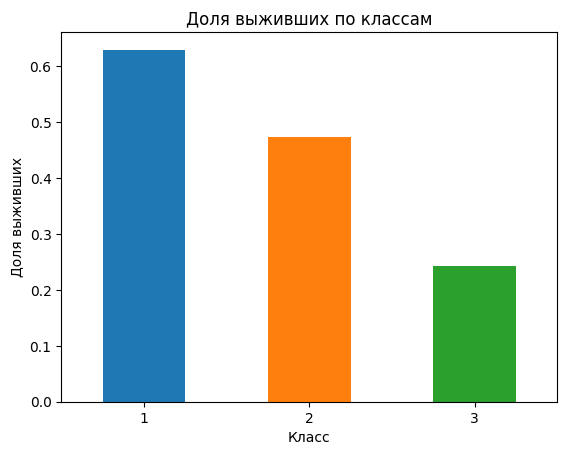


2. Подробная статистика по классам:
        Доля_выживших  Количество_выживших  Всего_пассажиров
Pclass                                                      
1            0.629630                  136               216
2            0.472826                   87               184
3            0.242363                  119               491

3. Доля выживших по классам и полу:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

4. Процент выживших по классам:
Pclass
1    63.0%
2    47.3%
3    24.2%
Name: Survived, dtype: object

5. Нормализованное распределение выживаемости:
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


In [19]:
import pandas as pd


titanic = pd.read_csv('titanic.csv')

# 1. Группировка по классу и расчет доли выживших
survival_by_class = titanic.groupby('Pclass')['Survived'].mean()
print("\n1. Доля выживших по классам:")
print(survival_by_class)

# 2. Визуализация результатов
import matplotlib.pyplot as plt

survival_by_class.plot(kind='bar', 
                      title='Доля выживших по классам',
                      ylabel='Доля выживших',
                      xlabel='Класс',
                      color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xticks(rotation=0)
plt.show()

# 3. Расширенная группировка с несколькими статистиками
class_stats = titanic.groupby('Pclass')['Survived'].agg(['mean', 'sum', 'count'])
class_stats.columns = ['Доля_выживших', 'Количество_выживших', 'Всего_пассажиров']
print("\n2. Подробная статистика по классам:")
print(class_stats)

# 4. Группировка по нескольким столбцам (класс + пол)
survival_by_class_sex = titanic.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print("\n3. Доля выживших по классам и полу:")
print(survival_by_class_sex)

# 5. Добавление процентов
survival_percent = survival_by_class * 100
print("\n4. Процент выживших по классам:")
print(survival_percent.round(1).astype(str) + '%')

# 6. Альтернативный вариант с value_counts() (нормализованные значения по классам)
survival_counts = titanic.groupby('Pclass')['Survived'].value_counts(normalize=True)
print("\n5. Нормализованное распределение выживаемости:")
print(survival_counts.unstack())

## Часть 4: Задания для практики
Прочитайте данные из файла 'titanic.csv'.
Проверьте, есть ли пропущенные значения в данных и заполните их нулями.
Выведите первые 10 строк данных.
Выберите только те строки, где значение в столбце 'Age' больше 30.
Отсортируйте данные по столбцу 'Fare' в порядке убывания.
Сгруппируйте данные по столбцу 'Pclass' и вычислите средний возраст ('Age') для каждого класса.

In [ ]:
import pandas as pd


data = pd.read_csv('titanic.csv')

# 1. Проверьте, есть ли пропущенные значения в данных и заполните их нулями
data = data.fillna(0)

# 2. Выведите первые 10 строк данных
print("Первые 10 строк данных:")
print(data.head(10))

# 3. Выберите только те строки, где значение в столбце 'Age' больше 30
age_over_30 = data[data['Age'] > 30]
print("\nСтроки, где 'Age' > 30:")
print(age_over_30)

# 4. Отсортируйте данные по столбцу 'Fare' в порядке убывания
sorted_data = data.sort_values(by='Fare', ascending=False)
print("\nДанные, отсортированные по убыванию 'Fare':")
print(sorted_data)

# 5. Сгруппируйте данные по столбцу 'Pclass' и вычислите средний возраст ('Age') для каждого класса
avg_age_by_class = data.groupby('Pclass')['Age'].mean()
print("\nСредний возраст по каждому классу (Pclass):")
print(avg_age_by_class)


Первые 10 строк данных:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   0.0      0   
6                            McCarthy, M